# Recitation 06

These exercises cover numerical solution of steady state and transient CSTR problems

**Topics Covered**

1. Lecture 17, Problem 02: Steady State CSTR, Algebric Solution
2. Lecture 17, Problem 02: Transient CSTR, ODE Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import solve_ivp

## Example Problem 01

Consider the following liquid-phase, irraversible, homogeneous reaction that is occuring in a perfectly-mixed CSTR

$$\textrm{A + B} \longrightarrow \textrm{C}$$

This reaction is first order in A and first order in B. You may assume that the liquid phase has a constant density. Additional data are given below:

$$k = 25.3 \frac{L}{mol \cdot h}$$
$$Q_f = 10 \frac{L}{h}$$
$$F_{Af} = 10 \frac{mol}{h}$$
$$F_{Bf} = 10 \frac{mol}{h}$$

What fractional conversion of species A is achieved in 1.24 L CSTR?

### Analytical Solution to Example Problem 01

We write a balance on A:

$$0 = F_{A,f} - F_A + R_AV$$

We see an intensive production rate, $R_A$, which we define as usual:

$$R_A = \sum_{i = 1}^{N_R} \nu_{i,A} \, r_i$$

And for this single reaction:

$$R_A = -r$$

We know the rate expression:

$$r = kC_AC_B$$

So this gives

$$R_A = -kC_AC_B$$

Which we can substitute into the material balance:

$$0 = F_{A,f} - F_A - kC_AC_BV$$

We have 3 unknowns in that equation: $F_A$, $C_A$, $C_B$. We are given Volume in the problem statement (1.24L).  If we want to solve this by hand, we'll need to express $F_A$, $C_A$, $C_B$ in terms of a single unknown.  I'll choose to work with fractional conversion of A here.  Completing a mole table, we find:

\begin{align}
    F_A &= F_{A,f}(1 - X_A) \\
    F_B &= F_{B,f} - F_{A,f}X_A \\
\end{align}

But:  we see in the problem statement, that for this problem, $F_{A,f} = F_{B,F}$.  So, in this special case:

\begin{align}
    F_A &= F_{A,f}(1 - X_A) \\
    F_B &= F_{A,f}(1 - X_A) \\
\end{align}

Then we define concentrations as usual; for a constant density flow reactor, $Q = Q_f$:

\begin{align}
    C_A &= F_A/Q_f \\
    C_B &= F_A/Q_f \\
\end{align}

Substituting everything into the material balance, we get:

$$0 = F_{A,f} - F_{A,f}(1 - X_A) - kF_{A,f}^2(1-X_A)^2\frac{V}{Q_f^2}$$

I solved this by simplifying, doing some FOIL magic, and using the quadratic formula.  Essentially, I get:

$$0 = X_A^2 + (\alpha - 2)X_A + 1$$

Where $\alpha = -Q_f^2/k/F_{A,f}/V$

If you solve that with the quadratic formula, you'll find two roots at:

$$X_A = 0.573$$

and at

$$X_A = 1.746$$

Mathematically, they are both fine, but physically, we can't have a conversion of more than 100% since it would mean we consume more reactant than we put into the reactor.  So we reject the upper root and conclude that our solution is:

$$X_A = 0.573$$

### Numerical Solution of Example Problem 01

This is a steady state CSTR, so it involves solution of algebric equations. This means that we need to use an algebraic equation solver like `opt.newton()` or `opt.root()` to solve the problem numerically.

Below, we'll create a univariate objective function by expressing all molar flowrates as functions of the fractional conversion of species A, $X_A$.

In [2]:
def P01(XA):
    FAf = 10 #mol/h
    FBf = 10 #mol/h
    Qf  = 10 #L/h
    k   = 25.3 #L/mol/h
    V   = 1.24 #L
    
    FA  = FAf*(1-XA)
    FB  = FBf - FAf*XA
    
    Q   = Qf
    CA  = FA/Q
    CB  = FB/Q
    
    r   = k*CA*CB
    
    RA  = -r
    
    LHS = FAf - FA + RA*V
    return LHS

In [3]:
XA0 = 0.5
sol, info = opt.newton(P01, XA0, full_output = True)
print(info, '\n')
print(f"At steady state, this 1.24L CSTR achieves a conversion of A of {sol:0.3f}.")

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.5727289521699684 

At steady state, this 1.24L CSTR achieves a conversion of A of 0.573.


## Example Problem 02: What if the CSTR is not at steady state?

Assume a CSTR initially contains a solvent that is equal in density to the typical reactor contents (it just has no reactants or products in it). The feed stream contains species A and B in a concentration of 1.00 $mol/L$. <ins>Approximately how long will it take to reach steady state?</ins> The volume of this reactor is 1.24 $L$. Additional details are below:

The raction being carried out is:

$$\textrm{A + B} \longrightarrow \textrm{P}$$

This reaction is first order in A and first order in B. You may assume that the liquid phase always has constant density that is exactly the same as the solvent initially inside of the reactor. You may additionally assume that, because of this, the volumetric flowrate into and out of the reactor are always equal.

$$k = 25.3 \ h^{-1}$$

$$Q_f = 10 \ L h^{-1}$$


### Solution to Example Problem 02

In this case, the left hand side of the material balance, $\frac{dN_j}{dt}$, no longer equal to zero. The transient CSTR becomes an ODE (initial value problem).

In [4]:
def P02(t,var): 
    NA  = var[0]
    NB  = var[1]
    k   = 25.3 #1/h
    V   = 1.24 #L
    CAf = 1.0 #mol/L
    CBf = 1.0 #mol/L
    Qf  = 10 #L/h  
    FAf = CAf * Qf
    FBf = CBf * Qf

    CA  = NA/V
    CB  = NB/V
    FA  = CA*Qf
    FB  = CB*Qf
    r   = k*CA*CB
    RA  = - r
    RB  = - r
    
    dNAdt = FAf - FA + RA*V
    dNBdt = FBf - FB + RB*V
    return [dNAdt, dNBdt]

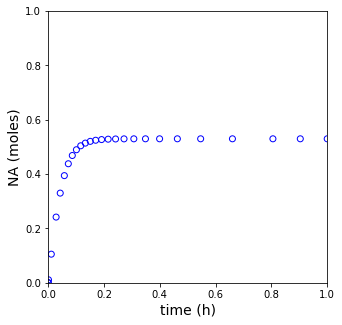

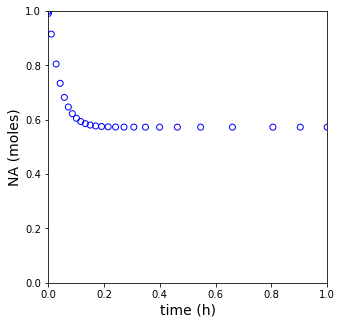

The steady state conversion in this reactor is XA = 0.573


In [5]:
k   = 25.3 #1/h
V   = 1.24 #L
CAf = 1.0 #mol/L
CBf = 1.0 #mol/L
Qf  = 10 #L/h  
FAf = CAf*Qf
FBf = CBf*Qf
N0 = [0.0, 0.0]
tspan = [0, 1]
sol_tCSTR = solve_ivp(P02,tspan, N0, atol = 1e-6, rtol = 1e-6)
tset = sol_tCSTR.t
NA   = sol_tCSTR.y[0,:]
FA   = NA/V*Qf
XA   = (FAf - FA)/FAf

plt.figure(1, figsize = (5, 5))
plt.scatter(tset, NA, color = 'none', edgecolors = 'blue')
plt.xlim(0, tspan[-1])
plt.xlabel('time (h)', fontsize = 14)
plt.ylim(0, 1)
plt.ylabel('NA (moles)', fontsize = 14)
plt.show(1)

plt.figure(2, figsize = (5, 5))
plt.scatter(tset, XA, color = 'none', edgecolors = 'blue')
plt.xlim(0, tspan[-1])
plt.xlabel('time (h)', fontsize = 14)
plt.ylim(0, 1)
plt.ylabel('NA (moles)', fontsize = 14)
plt.show(2)

print(f'The steady state conversion in this reactor is XA = {XA[-1]:0.3f}')

In [6]:
def P03(t, N, p): 
    NA, NB = N
    k, V, CAf, CBf, FAf, FBf, Qf = p
    Q = Qf
    
    CA, CB = N/V
    
    FA  = CA*Q
    FB  = CB*Q
    r   = k*CA*CB
    RA  = -r
    RB  = -r
    dNAdt   = FAf - FA + RA*V
    dNBdt   = FBf - FB + RB*V
    return [dNAdt, dNBdt]

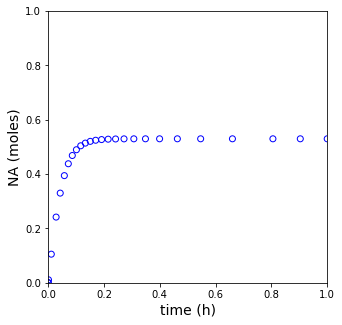

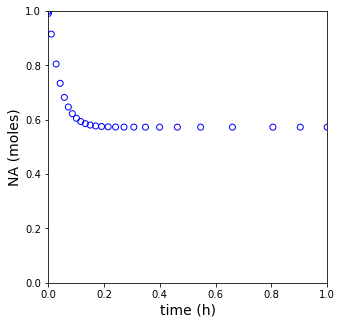

The steady state conversion in this reactor is XA = 0.573


In [7]:
k   = 25.3 #1/h
V   = 1.24 #L
CAf = 1.0 #mol/L
CBf = 1.0 #mol/L
Qf  = 10 #L/h  
FAf = CAf*Qf
FBf = CBf*Qf
parameters = [k, V, CAf, CBf, Qf, FAf, FBf]

N0 = np.array([0.0, 0.0])

#Pass parameters with a lambda function
#odeproblem = lambda t, NA: P03(t, NA, parameters)
#sol_tCSTR = solve_ivp(odeproblem,tspan, NA0, atol = 1e-6, rtol = 1e-6)
#Pass parameters with args keyword
sol_tCSTR = solve_ivp(P03,tspan, N0, args = (parameters, ), atol = 1e-6, rtol = 1e-6)

tset = sol_tCSTR.t
NA   = sol_tCSTR.y[0,:]
CA   = NA/V
FA   = CA*Qf
XA   = (FAf - FA)/FAf

plt.figure(1, figsize = (5, 5))
plt.scatter(tset, NA, color = 'none', edgecolors = 'blue')
plt.xlim(0, tspan[-1])
plt.xlabel('time (h)', fontsize = 14)
plt.ylim(0, 1)
plt.ylabel('NA (moles)', fontsize = 14)
plt.show(1)

plt.figure(2, figsize = (5, 5))
plt.scatter(tset, XA, color = 'none', edgecolors = 'blue')
plt.xlim(0, tspan[-1])
plt.xlabel('time (h)', fontsize = 14)
plt.ylim(0, 1)
plt.ylabel('NA (moles)', fontsize = 14)
plt.show(2)

print(f'The steady state conversion in this reactor is XA = {XA[-1]:0.3f}')